In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [9]:
path="final_raw1.csv"

In [10]:
_data=pd.read_csv(path)

In [11]:
_data.head()

,HR,SpO2,NBP_Mean,Temp,RR
0,101,97,105,35.9,10
1,101,97,105,35.9,10
2,101,97,105,35.9,10
3,101,97,105,35.9,10
4,101,97,105,35.9,10


In [12]:
### Get all the features columns except some signs
features = list(_data.columns)

### Get the features data
data = _data[features]

In [13]:
data

,HR,SpO2,NBP_Mean,Temp,RR
0,101,97,105,35.9,10
1,101,97,105,35.9,10
2,101,97,105,35.9,10
3,101,97,105,35.9,10
4,101,97,105,35.9,10
...,...,...,...,...,...
5966,76,100,64,36.0,16
5967,76,100,64,36.0,16
5968,76,100,64,36.0,16
5969,76,100,64,36.0,16


In [14]:
clustering_kmeans = KMeans(n_clusters=9, precompute_distances="auto", n_jobs=-1)
data['clusters'] = clustering_kmeans.fit_predict(data)

c:\users\varun siddartha\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
c:\users\varun siddartha\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [15]:
data['clusters'] = clustering_kmeans.fit_predict(data)

c:\users\varun siddartha\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
c:\users\varun siddartha\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


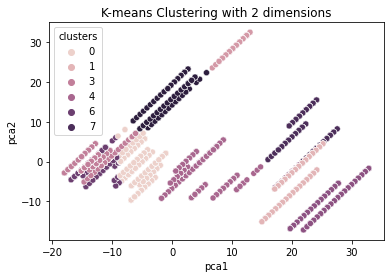

In [16]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=2).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [17]:
reduced_data = PCA(n_components=6).fit_transform(data)
reduced_data

array([[ 3.28087585e+01, -1.72871330e+00, -2.54270477e+00,
        -1.62942498e-01,  1.81564247e+00,  3.26144297e-03],
       [ 3.28087585e+01, -1.72871330e+00, -2.54270477e+00,
        -1.62942498e-01,  1.81564247e+00,  3.26144297e-03],
       [ 3.28087585e+01, -1.72871330e+00, -2.54270477e+00,
        -1.62942498e-01,  1.81564247e+00,  3.26144297e-03],
       ...,
       [-1.51254034e+01,  1.21838190e+00,  3.95105771e+00,
         1.07049658e+00, -4.09274699e-01,  1.65383321e-02],
       [-1.51254034e+01,  1.21838190e+00,  3.95105771e+00,
         1.07049658e+00, -4.09274699e-01,  1.65383321e-02],
       [-1.51254034e+01,  1.21838190e+00,  3.95105771e+00,
         1.07049658e+00, -4.09274699e-01,  1.65383321e-02]])

In [18]:
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

ValueError: Shape of passed values is (5971, 6), indices imply (5971, 2)